<a href="https://colab.research.google.com/github/SRISHTINIGAM02/23/blob/main/Project_117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [2]:
import pandas as pd

df = pd.read_csv("BankNote_Authentication.csv")

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
from sklearn.model_selection import train_test_split

variance = df["variance"]
category = df["class"]

variance_train , variance_test, category_train, category_test = train_test_split(variance, category, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(variance_train.ravel(), (len(variance_train), 1))
Y = np.reshape(category_train.ravel(), (len(category_train), 1))

classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [5]:
X_test = np.reshape(variance_test.ravel(), (len(variance_test), 1))
Y_test = np.reshape(category_test.ravel(), (len(category_test), 1))

category_prediction = classifier.predict(X_test)

predicted_values = []
for i in category_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

actual_values = []
for i in Y_test.ravel():
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

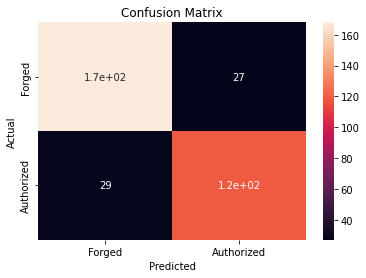

In [8]:
labels = ["Forged", "Authorized"]

cm = confusion_matrix(actual_values, predicted_values)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [9]:
accuracy = 1.2e+02 + 1.7e+02 * 100 / 1.2e+02 + 1.7e+02 + 27 + 29
print("Accuracy:", (accuracy))

Accuracy: 487.66666666666663


In [10]:
factors = df[["variance", "skewness", "curtosis", "entropy"]]
category = df["class"]

factors_train , factors_test, category_train, category_test = train_test_split(factors, category, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

factors_train = sc_x.fit_transform(factors_train)
factors_test = sc_x.transform(factors_test)

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(factors_train, category_train)

LogisticRegression(random_state=0)

In [12]:
category_prediction_1 = classifier2.predict(factors_test)

predicted_values_1 = []
for i in category_prediction_1:
  if i == 0:
    predicted_values_1.append("Authorized")
  else:
    predicted_values_1.append("Forged")

actual_values_1 = []
for i in category_prediction.ravel():
  if i == 0:
    actual_values_1.append("Authorized")
  else:
    actual_values_1.append("Forged")

[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

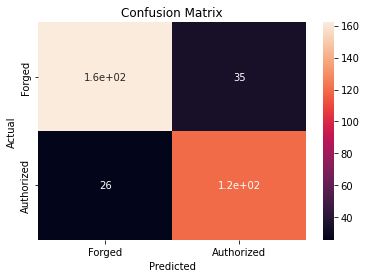

In [14]:
cm = confusion_matrix(actual_values_1, predicted_values_1)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [15]:
accuracy = 1.2e+02 + 1.6e+02 * 100 / 1.2e+02 + 1.6e+02 + 35 + 26
print("Accuracy:", (accuracy))

Accuracy: 474.33333333333337
